# AlexNet

## Objectives
- **Improving Image Classification Performance**: AlexNet aimed to outperform existing models on image classification benchmarks, particularly the ImageNet dataset, which contains millions of labeled images across thousands of categories

- **Leveraging GPU Computing for Training**: Training deep neural networks requires significant computational resources. AlexNet was one of the first models to effectively leverage GPUs for training, which drastially reduced training time and enabled the exploration of deeper and more complex models

- **Introducing ReLU Non-linearity**: ReLU activation functions were introduced to mitigate the vanishing gradient problem

## Architecture

AlexNet's architecture is a CNN that consists of 12 layers: 5 convolutional layers and 3 pooling layers followed by 3 fully connected layers:

1. **Input Layer**: The input to AlexNet is a colored image of size 224x224 pixels with 3 color channels (RGB)
2. **First Convolutional Layer**: This layer applies 96 convolutional filters with a kernel size of 11x11 and a stride of 4. This results in an output volume of 55x55x96
3. **First Pooling Layer**: Max-pooling with 3x3 window, stride of 2, reducing the spatial dimensions to 27x27x96
4. **Second Convolutional Layer**: Applies 256 convolutional filters with a kernel size of 5x5, stride of 1, and padding of 2, resulting in an output volume of 27x27x256
5. **Second Pooling Layer**: Max-pooling with 3x3 window, stride of 2, reducing the spatial dimensions to 13x13x256
6. **Third Convolutional Layer**: Applies 384 convolutional filters with a kernel size of 3x3, stride of 1, and padding of 1, resulting in an output volume of 13x13x384
7. **Fourth Convolutional Layer**: Similar to the third convolutional layer, it applies 384 filters with the same parameters, resulting in an output volume of 13x13x384
8. **Fifth Convolutional Layer**: Applies 256 convolutional filters with a kernel size of 3x3, stride of 1, and padding of 1, resulting in an output volume of 13x13x256
9. **Third Pooling Layer**: Max-pooling with 3x3 window, stride of 2, reducing the spatial dimensions to 6x6x256
10. **First Fully Connected Layer**: 4096 neurons
11. **Second Fully Connected Layer**: 4096 neurons
12. **Third Fully Connected Layer (Output Layer)**: Dense layer with 1000 neurons, one for each class in the ImageNet dataset

### Use AlexNet:

- On medium-scale image classification tasks with moderate computational resources
- In legacy systems where compatibility is necessary
- For transfer learning with pretrained models for less complex tasks

### Avoid AlexNet:

- When state-of-the-art performance and high accuracy are required
- On very large-scale datasets where newer models excel
- In resource-constrained environments where more efficient models are needed
- For cutting-edge research and development exploring new deep learning techniques
- When more advanced models can provide better feature extraction and performance in transfer learning

### Libraries

In [1]:
import torch
from torch import nn
from d2l import torch as d2l

### Initialization and creation of the CNN

In [2]:
def init_cnn(module): # first defined in the LeNet notebook
    if (type(module) == nn.Linear or type(module) == nn.Conv2d):
        nn.init.xavier_uniform_(module.weight)


class AlexNet(d2l.Classifier):
    def __init__(self, lr=0.1, num_classes=10):
        super().__init__()
        self.save_hyperparameters()
        self.net = nn.Sequential(
            nn.LazyConv2d(96, kernel_size=11, stride=4, padding=1), nn.ReLU(), # 96 channels, 11x11 kernel, 4 stride and 1 padding
            nn.MaxPool2d(kernel_size=3, stride=2), # 3x3 kernel, 2 stride
            nn.LazyConv2d(256, kernel_size=5, padding=2), nn.ReLU(), # 256 channels, 5x5 kernel, 2 padding
            nn.MaxPool2d(kernel_size=3, stride=2), # 3x3 kernel, 2 stride
            nn.LazyConv2d(384, kernel_size=3, padding=1), nn.ReLU(), # 384 channels, 3x3 kernel, 1 padding
            nn.LazyConv2d(384, kernel_size=3, padding=1), nn.ReLU(), # same as the previous layer
            nn.LazyConv2d(256, kernel_size=3, padding=1),nn.ReLU(), # 256 channels, 3x3 kernel, 1 padding
            nn.MaxPool2d(kernel_size=3, stride=2), # 3x3 kernel, 2 stride
            nn.Flatten(), # flatten the output for the fully connected layers
            nn.LazyLinear(4096), nn.ReLU(), nn.Dropout(p=0.5), # 4096 units with dropout
            nn.LazyLinear(4096), nn.ReLU(), nn.Dropout(p=0.5), # same as the previous layer
            nn.LazyLinear(num_classes) # output layer
        )
        self.net.apply(d2l.init_cnn) # applying the weight initialization

### Evaluation of the correctness of each layer

In [3]:
def layer_summary(self, X_shape): # first defined in the LeNet notebook
    X = torch.randn(X_shape)
    for layer in self.net:
        X = layer(X)
        print(layer.__class__.__name__, 'output shape:\t', X.shape)

model = AlexNet()
layer_summary(model, (1, 1, 224, 224))

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/lazy.py:181: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


Conv2d output shape:	 torch.Size([1, 96, 54, 54])
ReLU output shape:	 torch.Size([1, 96, 54, 54])
MaxPool2d output shape:	 torch.Size([1, 96, 26, 26])
Conv2d output shape:	 torch.Size([1, 256, 26, 26])
ReLU output shape:	 torch.Size([1, 256, 26, 26])
MaxPool2d output shape:	 torch.Size([1, 256, 12, 12])
Conv2d output shape:	 torch.Size([1, 384, 12, 12])
ReLU output shape:	 torch.Size([1, 384, 12, 12])
Conv2d output shape:	 torch.Size([1, 384, 12, 12])
ReLU output shape:	 torch.Size([1, 384, 12, 12])
Conv2d output shape:	 torch.Size([1, 256, 12, 12])
ReLU output shape:	 torch.Size([1, 256, 12, 12])
MaxPool2d output shape:	 torch.Size([1, 256, 5, 5])
Flatten output shape:	 torch.Size([1, 6400])
Linear output shape:	 torch.Size([1, 4096])
ReLU output shape:	 torch.Size([1, 4096])
Dropout output shape:	 torch.Size([1, 4096])
Linear output shape:	 torch.Size([1, 4096])
ReLU output shape:	 torch.Size([1, 4096])
Dropout output shape:	 torch.Size([1, 4096])
Linear output shape:	 torch.Size([1,

### Training

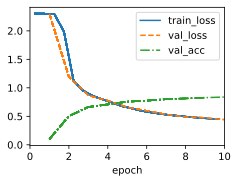

In [5]:
model = AlexNet(lr=0.01)
data = d2l.FashionMNIST(batch_size=128, resize=(224, 224)) # images are normally 24x24 in this dataset, we resize them to be faithful to the model
trainer = d2l.Trainer(max_epochs=10, num_gpus=1)
trainer.fit(model, data)

#### Training Loss, Validation Loss and Validation Accuracy:

- **Training Loss**: The training loss is a measure of how well the model is performing on the training dataset. It quantifies the difference between the predicted outputs and the actual labels for the training data

- **Validation Loss**: The validation loss is a measure of how well the model is performing on a separate validation dataset that was not used for training. It is also a measure of the difference between the predicted outputs and the actual labels but for the validation data

- **Validation Accuracy**: The validation accuracy is the proportion of correctly predicted labels to the total labels in the validation dataset. It gives a direct measure of how often the model's predictions are correct on the validation data

Ideally, both the training loss and validation loss should decrease over time as the model learns. If they both decrease and stabilize at low values, the model is learning well.
If the training loss continues to decrease but the validation loss starts to increase after a certain point, the model is likely overfitting. This means the model is memorizing the training data rather than learning to generalize from it.


The validation accuracy should increase over time and ideally plateau at a high value. Consistently high validation accuracy alongside low validation loss indicates a well-trained model.
If the validation accuracy stops improving and starts decreasing while the training accuracy continues to increase, this is another sign of overfitting.